# Lower your risks!
## by Yazeed Alsulayhim

## Investigation Overview

> We will go over 3 questions.
1. What affects the borrowers annual interest rate (APR)?
2. What makes people with less earning jobs standout and have a low APR?
3. What is associated with a low prosper score?

## Dataset Overview

> The dataset analyzed is the prosper loan data. It has 113937 and 81 features, every row is a loan. This analysis was conducted over only 23 features out of the 81 feature.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


Bad key "text.kerning_factor" on line 4 in
/Users/yazeed/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")


In [4]:
# We will plot the top 5 and the last 5 occupations based on BorrowerAPR
occupations_apr = df.groupby("Occupation").BorrowerAPR.mean().sort_values(ascending=False)
top10_occ_apr_most = occupations_apr[:5]
top10_occ_apr_least = occupations_apr[-5:]
top10_occ_apr = top10_occ_apr_most.append(top10_occ_apr_least)
top10_occ_apr.index

Index(['Teacher's Aide', 'Nurse's Aide', 'Student - College Freshman',
       'Bus Driver', 'Administrative Assistant', 'Computer Programmer',
       'Engineer - Chemical', 'Pharmacist', 'Doctor', 'Judge'],
      dtype='object', name='Occupation')

In [5]:
top10_occ_apr.index = ["Teacher's Aide", "Nurse's Aide", "College Student",
       'Bus Driver', 'Administrative Assistant', 'Computer Programmer',
       'Engineer - Chemical', 'Pharmacist', 'Doctor', 'Judge']

In [6]:
apr_mean = df["BorrowerAPR"].mean()
apr_mean

0.218827655909788

In [8]:
color=['#FF5733','#FF5733','#FF5733','#FF5733','#FF5733','#228B22','#228B22','#228B22','#228B22','#228B22']

## Occupation V.S APR 

> * Occupation is the most important factor when deciding the apr score.
> * Let's look at a graph that shows the top 5 and worst 5 occupations based on apr%.

In [9]:
plt.figure(figsize=(12, 7));
plt.bar(top10_occ_apr.index, top10_occ_apr.values, color=color);
plt.axhline(apr_mean)
plt.annotate("APR% Mean", xy=(4.5, apr_mean+0.005))
red_patch = mpatches.Patch(color='#FF5733', label='Worst occupations')
green_patch = mpatches.Patch(color='#228B22', label='Top occupations')
plt.legend(handles=[red_patch, green_patch])

plt.xticks(rotation=15);
plt.xlabel("Occupations")
plt.ylabel("APR%")
plt.title("5 Most & least APR score based on (occupation)");


In [10]:
occupations_apr = df.groupby("Occupation").BorrowerAPR.mean().sort_values(ascending=False)
low_occupations = occupations_apr[:10]
high_occupations = occupations_apr[-10::]
threshold = high_occupations.values.mean()

low_occ_df = df.loc[(df["Occupation"].isin(low_occupations.index.values))].copy()
low_occ_df["OccupationCondition"] = "bad"
low_occ_df.loc[(df["BorrowerAPR"] < threshold), "OccupationCondition"] = "good"
bad_sample = low_occ_df.query("OccupationCondition == 'bad'").sample(4000)
good_sample = low_occ_df.query("OccupationCondition == 'good'").sample(4000)

low_occ_balanced = pd.concat([bad_sample, good_sample])

## What makes people with less earning jobs standout and have a low APR?

> 1. Home owning 

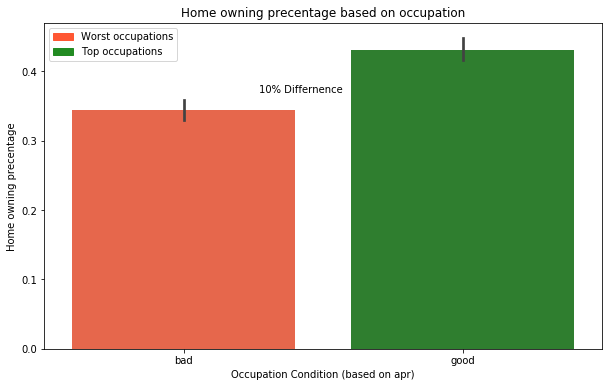

In [17]:
plt.figure(figsize=[10,6])
sns.barplot(low_occ_balanced["OccupationCondition"], low_occ_balanced["IsBorrowerHomeowner"], palette =['#FF5733', '#228B22']);
plt.title("Home owning precentage based on occupation");
plt.xlabel("Occupation Condition (based on apr)");
plt.ylabel("Home owning precentage");
red_patch = mpatches.Patch(color='#FF5733', label='Worst occupations')
green_patch = mpatches.Patch(color='#228B22', label='Top occupations')
plt.legend(handles=[red_patch, green_patch]);
plt.annotate("10% Differnence", (0.27, 0.37));

In [18]:
#Good stands for low apr whild Bad stands for high apr
states_apr = df.groupby("BorrowerState")["BorrowerAPR"].mean()
states_median = states_apr.median()
low_occ_balanced["StateCondition"] = np.nan
for i in low_occ_balanced.index.values:
    try:
        state_apr = states_apr[low_occ_balanced.loc[i, "BorrowerState"]]
        if state_apr >= states_median:
            low_occ_balanced.loc[i, "StateCondition"] = "bad"
        else:
            low_occ_balanced.loc[i, "StateCondition"] = "good"
    except:
        pass


> 2. Living location

In [19]:
temp_df = low_occ_balanced.groupby("OccupationCondition")["StateCondition"]

In [20]:
g = sns.catplot(
    data=low_occ_balanced, kind="count",
    x="StateCondition", hue="OccupationCondition",
    ci="sd", palette =['#FF5733', '#228B22'], height=6
)
plt.title("People with bad occupations resedince state (based on apr).");
plt.ylabel("People with good/bad apr%");
plt.xlabel("State Condition (APR%)");

## What is associated with a low prosper score?

> I have found that the most important factor when deciding the prosper score is the the credit utilization ratio.

In [21]:
df.loc[(df["ProsperScore"] <=5), "ProsperCondition"] = "Low"
df.loc[(df["ProsperScore"] >5), "ProsperCondition"] = "High"

In [22]:
plt.figure(figsize=[8,5])
sns.violinplot(df["BankcardUtilization"], df["ProsperCondition"],palette =['#228B22', '#FF5733']);
plt.title("Distribution of the credit utilization ratio based on prosper score")
plt.xlabel("The credit utilization ratio")
plt.ylabel("Prsper score rank")
red_patch = mpatches.Patch(color='#FF5733', label='Low Prosper Score')
green_patch = mpatches.Patch(color='#228B22', label='High Propser Score')
plt.legend(handles=[red_patch, green_patch]);